
# PTSD Model Inference with IRT Features

## [Center for Health Statistics](http://www.healthstats.org)

## [The Zero Knowledge Discovery Lab](http://zed.uchicago.edu)
---



In [1]:
import ccx as cx
import pylab as plt
plt.style.use('ggplot')
import pickle
import pandas as pd
%matplotlib inline

In [2]:
datafile='../data/CAD-PTSDData.csv'

In [3]:
def processDATA(datafile):
    '''
        process data file 
        into training data X, target labels y
    '''
    Df=pd.read_csv(datafile)
    X=Df.drop(['record_id','PTSDDx'],axis=1).values
    y=Df.drop(['record_id'],axis=1).PTSDDx.values
    [nsamples,nfeatures]=X.shape
    return X,y,nfeatures,nsamples

In [4]:
X,y,nfeatures,nsamples=processDATA(datafile)

100%|██████████| 1000/1000 [00:01<00:00, 677.73it/s]


0


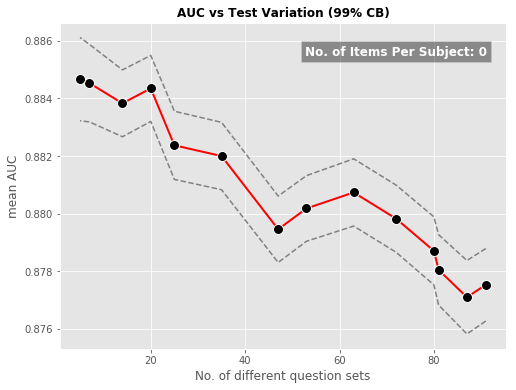

In [5]:
Perf23,Dperf23,Models23,Nitems23=cx.getSystem(X,y,max_depth=2,n_estimators=3)
print(Nitems23)
cx.PLOT(Dperf23,Nitems23,dn='23')

100%|██████████| 1000/1000 [00:01<00:00, 738.79it/s]


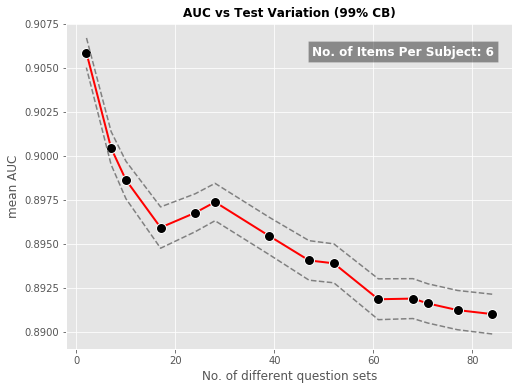

In [6]:
Perf32,Dperf32,Models32,Nitems32=cx.getSystem(X,y,max_depth=3,n_estimators=2)
cx.PLOT(Dperf32,Nitems32,dn='32')

In [7]:
cx.pickleModel(Models23,threshold=.88,filename='../model/model_2_3.pkl')
print("--")
cx.pickleModel(Models32,threshold=.895,filename='../model/model_3_2.pkl')

number of models (tests): 222
Number of items used:  138
Item Use Fraction: 0.6216216216216216
--
number of models (tests): 129
Number of items used:  161
Item Use Fraction: 1.248062015503876
